# Analysis of Unemployment in Canada

## Introduction

## Data Overview

In [ ]:
# if don't have kagglehub run this first
pip install kagglehub

In [76]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("pienik/unemployment-in-canada-by-province-1976-present")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\car_f\.cache\kagglehub\datasets\pienik\unemployment-in-canada-by-province-1976-present\versions\26


In [78]:
import os

# load the data
file_path = os.path.join(path, "Unemployment_Canada_1976_present.csv")
df = pd.read_csv(file_path)
df.head()

,REF_DATE,GEO,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
0,1976-01,Alberta,Both sexes,15 to 24 years,231800.0,174900.0,252300.0,56900.0,362300.0,20500.0,64.0,69.6,8.1
1,1976-01,Alberta,Both sexes,15 to 64 years,802400.0,682100.0,837500.0,120300.0,1154800.0,35000.0,69.5,72.5,4.2
2,1976-01,Alberta,Both sexes,15 years and over,819500.0,693700.0,856500.0,125800.0,1276700.0,37000.0,64.2,67.1,4.3
3,1976-01,Alberta,Both sexes,25 to 54 years,491400.0,439800.0,505800.0,51600.0,661700.0,14400.0,74.3,76.4,2.8
4,1976-01,Alberta,Both sexes,25 years and over,587700.0,518800.0,604200.0,68900.0,914400.0,16500.0,64.3,66.1,2.7


In [80]:
df.shape

(38985, 13)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38985 entries, 0 to 38984
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REF_DATE               38985 non-null  object 
 1   GEO                    38985 non-null  object 
 2   Sex                    38985 non-null  object 
 3   Age group              38985 non-null  object 
 4   Employment             38985 non-null  float64
 5   Full-time employment   37290 non-null  float64
 6   Labour force           38985 non-null  float64
 7   Part-time employment   37289 non-null  float64
 8   Population             38985 non-null  float64
 9   Unemployment           38979 non-null  float64
 10  Employment rate        38985 non-null  float64
 11  Participation rate     38985 non-null  float64
 12  Unemployment rate      38979 non-null  float64
dtypes: float64(9), object(4)
memory usage: 3.9+ MB


### Observations

Columns of the dataset:
* **REF_DATE**: The reference period (by year, month).
* **GEO**: The geographic area.
* **Sex**: The sex being investigated.
* **Age group**: The age group of the economic measure.
* **Employment**: Number of persons who, during the reference week, worked for pay or profit.
* **Full-time employment**: Number of persons who usually work 30 hours or more per week at their main or only job.
* **Labour force**: Number of civilian, non-institutionalized persons 15 years of age and over who, during the reference week, were employed or unemployed.
* **Part-time employment**: Number of persons who usually work less than 30 hours per week at their main or only job.
* **Population**: Number of persons of working age, 15 years and over.
* **Unemployment**: Number of persons who, during the reference week, were without work, had looked for work in the past four weeks, and were available for work.
* **Employment rate**: The employment rate is the number of persons employed expressed as a percentage of the population 15 years of age and over.
* **Participation rate**: The participation rate is the number of labour force participants expressed as a percentage of the population 15 years of age and over.
* **Unemployment rate**: The unemployment rate is the number of unemployed persons expressed as a percentage of the labour force.


This datasets is contains 38985 rows and 13 columns, there is some missing values in the columns 'Full-tome employment' having only 37290 non-null values, 'Part-time employment' having only 37290 non-null values, 'Unemployment' and 'Unemployment rate' having 38979 non-missing values, to fill this missing values an analysis will be performed to determine the best strategy.

## EDA

In [87]:
# set REF_DATE to date time
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

In [89]:
# replace the spaces with underscore
df.columns = list(map(lambda x: x.replace('-', '').strip().replace(' ', '_'), df.columns))

In [91]:
# descriptive data
df.describe()

,REF_DATE,Employment,Fulltime_employment,Labour_force,Parttime_employment,Population,Unemployment,Employment_rate,Participation_rate,Unemployment_rate
count,38985,3.898500e+04,3.729000e+04,3.898500e+04,3.728900e+04,3.898500e+04,3.897900e+04,38985.000000,38985.000000,38979.000000
mean,1999-07-02 01:26:39.292035328,1.674920e+06,1.402672e+06,1.817379e+06,2.846479e+05,2.672215e+06,1.424808e+05,57.681218,63.677543,9.472131
min,1976-01-01 00:00:00,5.000000e+03,4.100000e+03,5.700000e+03,5.000000e+02,1.770000e+04,2.000000e+02,11.600000,13.900000,0.800000
25%,1987-10-01 00:00:00,1.428000e+05,1.039000e+05,1.605000e+05,2.420000e+04,2.993000e+05,1.480000e+04,50.900000,59.300000,6.100000
50%,1999-07-01 00:00:00,4.172000e+05,3.123000e+05,4.475000e+05,7.150000e+04,6.890000e+05,3.690000e+04,60.400000,66.500000,8.500000
75%,2011-04-01 00:00:00,1.643800e+06,1.316950e+06,1.787500e+06,2.924000e+05,2.698000e+06,1.502000e+05,68.900000,75.500000,12.000000
max,2023-01-01 00:00:00,2.003230e+07,1.643700e+07,2.107830e+07,3.677100e+06,3.207040e+07,2.691100e+06,87.800000,91.600000,36.200000
std,NaN,3.157376e+06,2.709031e+06,3.406108e+06,5.369204e+05,4.817956e+06,2.609124e+05,16.254158,17.256123,4.565192


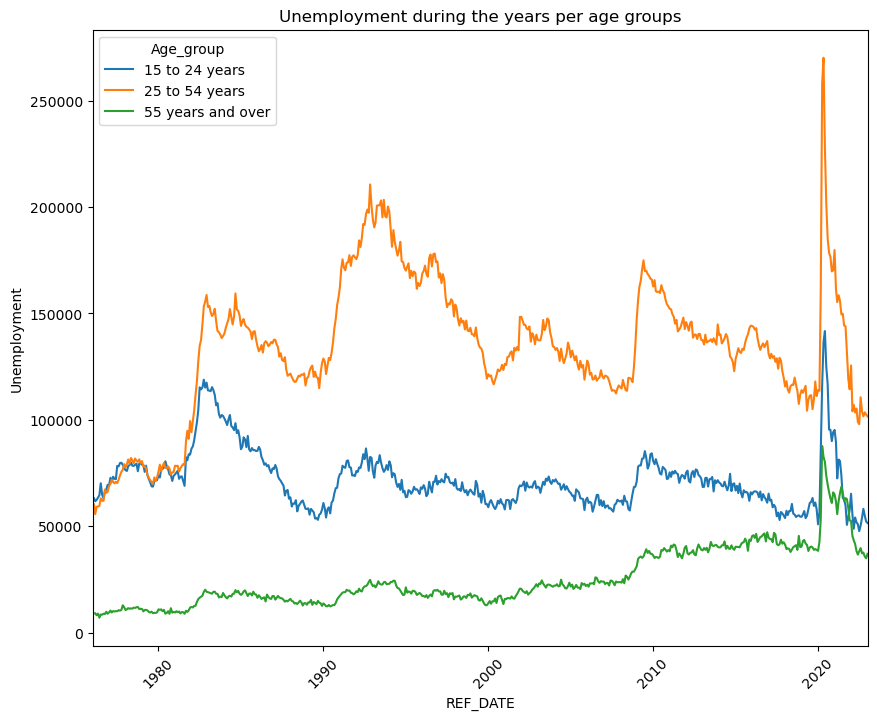

In [93]:
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates

# create visualisations
## divide the population in three, young(15 to 24 years), adult(25 to 54 years), and old(55 years and over)
age_groups = ['15 to 24 years', '25 to 54 years', '55 years and over']
df_age_groups = df[df.Age_group.isin(age_groups)]
## line plot unemployment douring the time
plt.figure(figsize=(10, 8))
sb.lineplot( data=df_age_groups, x='REF_DATE', y='Unemployment', hue='Age_group', errorbar=None)

#fix the x axis ticks every 10 years
ax = plt.gca()
ax.set_xlim(df_age_groups['REF_DATE'].min(), df['REF_DATE'].max())
ax.xaxis.set_major_locator(mdates.YearLocator(10, month=1, day=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.title('Unemployment during the years per age groups')
plt.show()

### Observations

The picks can be because of recessions, for example the recession in the 1981-1982, or the recession on 1990-1991 or the recession durin Covid-19

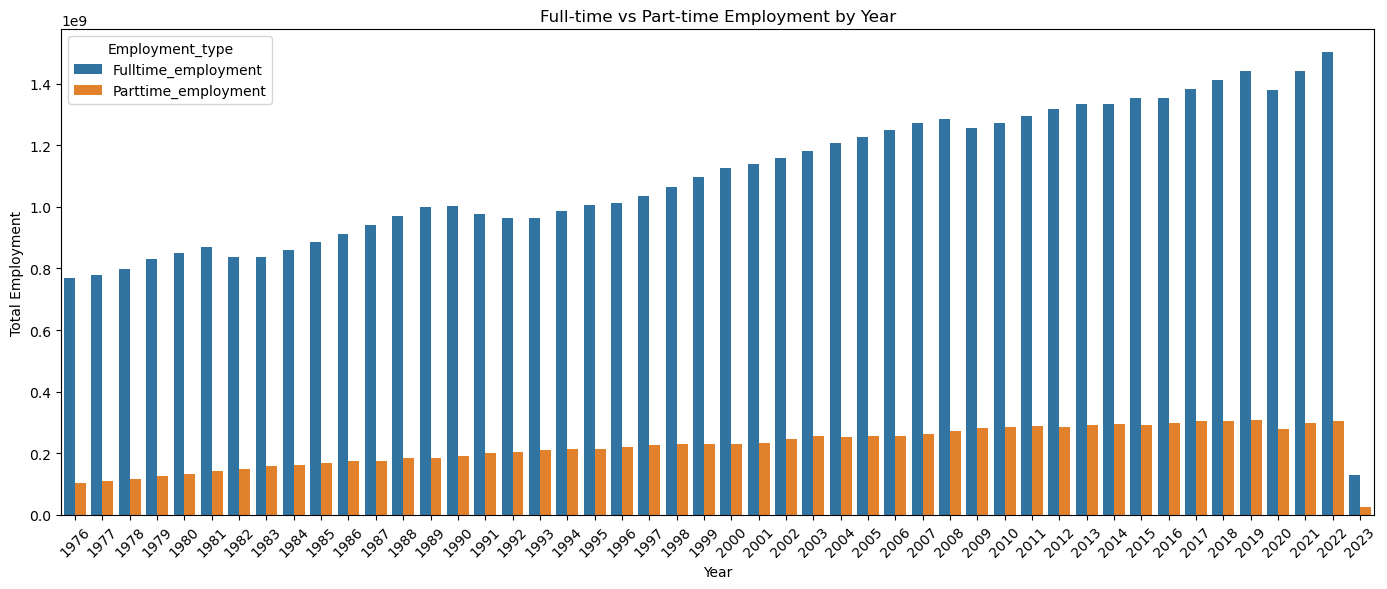

In [97]:
# bar plot to compare the full-time and part-time employments over the years
## get the year
df['Year'] = df['REF_DATE'].dt.year

df_melted = pd.melt(df,
                    id_vars='Year',
                    value_vars=['Fulltime_employment', 'Parttime_employment'],
                    var_name='Employment_type',
                    value_name='Count')

# gruop by year and job type
employment_by_year = df_melted.groupby(['Year', 'Employment_type'])['Count'].sum().reset_index()

# Graf
plt.figure(figsize=(14, 6))
sb.barplot(data=employment_by_year, x='Year', y='Count', hue='Employment_type')

plt.title('Full-time vs Part-time Employment by Year')
plt.ylabel('Total Employment')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations

There is a growing trent in both full-time and part-time employers, more employers have full-time job than part-time job.

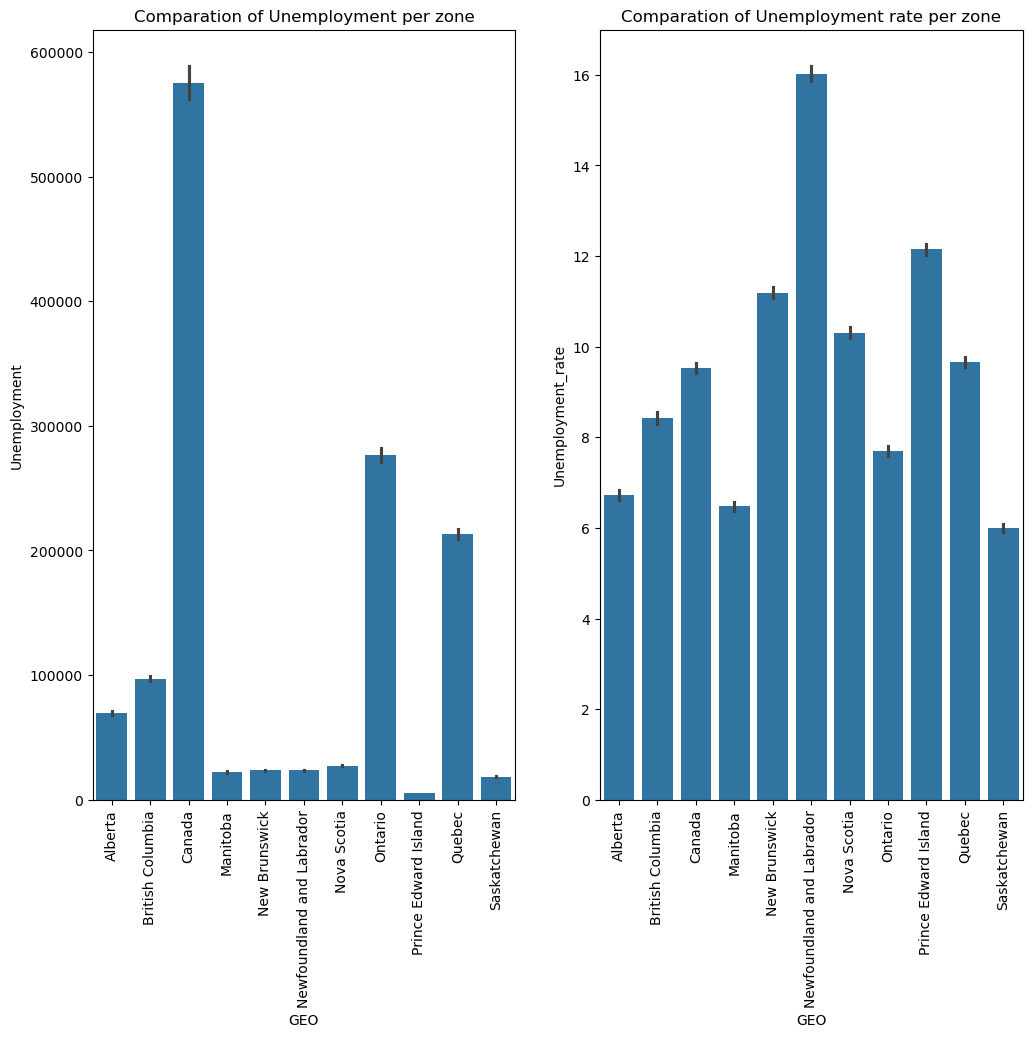

In [100]:
# unemployment per zone
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)
sb.barplot(df, x='GEO', y='Unemployment')
plt.title('Comparation of Unemployment per zone')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sb.barplot(df, x='GEO', y='Unemployment_rate')
plt.title('Comparation of Unemployment rate per zone')
plt.xticks(rotation=90)
plt.show()

### Observations

Ontario and Quebec have the highest total number of unemployed individuals (excluding "Canada," which reflects the national total). This does not necessarily indicate worse labor market performance, but rather reflects the larger population size in these provinces.

Newfoundland and Labrador has the highest unemployment rate (around 16%), despite having a lower absolute number of unemployed individual. Ontario and Quebec, although showing high total unemployment, have moderate unemployment rates (~7.5–9%), indicating that unemployment is distributed across a large active population. Saskatchewan and Manitoba show the lowest unemployment rates (below 7%), suggesting healthier labor markets relative to their workforce.

## Data Clean and Preprocesing

In [105]:
# checking the missing values
df.isnull().sum()

REF_DATE                  0
GEO                       0
Sex                       0
Age_group                 0
Employment                0
Fulltime_employment    1695
Labour_force              0
Parttime_employment    1696
Population                0
Unemployment              6
Employment_rate           0
Participation_rate        0
Unemployment_rate         6
Year                      0
dtype: int64

In [106]:
df[df['Fulltime_employment'].isnull()]

,REF_DATE,GEO,Sex,Age_group,Employment,Fulltime_employment,Labour_force,Parttime_employment,Population,Unemployment,Employment_rate,Participation_rate,Unemployment_rate,Year
12,1976-01-01,Canada,Both sexes,15 to 19 years,999200.0,NaN,1178900.0,NaN,2330000.0,179700.0,42.9,50.6,15.2,1976
16,1976-01-01,Canada,Both sexes,20 to 24 years,1500400.0,NaN,1670500.0,NaN,2179800.0,170100.0,68.8,76.6,10.2,1976
19,1976-01-01,Canada,Both sexes,55 to 64 years,955600.0,NaN,999700.0,NaN,1886900.0,44100.0,50.6,53.0,4.4,1976
81,1976-02-01,Canada,Both sexes,15 to 19 years,1000500.0,NaN,1177800.0,NaN,2333000.0,177300.0,42.9,50.5,15.1,1976
85,1976-02-01,Canada,Both sexes,20 to 24 years,1508600.0,NaN,1679300.0,NaN,2185200.0,170700.0,69.0,76.8,10.2,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38863,2022-12-01,Canada,Both sexes,20 to 24 years,1708900.0,NaN,1864200.0,NaN,2404600.0,155300.0,71.1,77.5,8.3,2022
38866,2022-12-01,Canada,Both sexes,55 to 64 years,3300500.0,NaN,3451000.0,NaN,5144500.0,150600.0,64.2,67.1,4.4,2022
38928,2023-01-01,Canada,Both sexes,15 to 19 years,959600.0,NaN,1090200.0,NaN,2112500.0,130600.0,45.4,51.6,12.0,2023
38932,2023-01-01,Canada,Both sexes,20 to 24 years,1726700.0,NaN,1879500.0,NaN,2412000.0,152700.0,71.6,77.9,8.1,2023


In [107]:
df[(df['Fulltime_employment'].isnull()) & (df['GEO']!= 'Canada')]

,REF_DATE,GEO,Sex,Age_group,Employment,Fulltime_employment,Labour_force,Parttime_employment,Population,Unemployment,Employment_rate,Participation_rate,Unemployment_rate,Year


All missing values in Full-time employment and Part-time employment correspond to the region Canada and are associated with the age groups '15 to 19 years', '20 to 24 years', and '55 to 64 years'.
To address this, I will impute the missing values by taking the Labour force value and splitting it into 80% for full-time employment and 20% for part-time employment, based on the distribution observed in the bar chart.

In [109]:
mask = df['Fulltime_employment'].isnull() & df['Parttime_employment'].isnull()

df.loc[mask, 'Fulltime_employment'] = round(df.loc[mask, 'Employment'] * 0.8)
df.loc[mask, 'Parttime_employment'] = round(df.loc[mask, 'Employment'] * 0.2)

In [110]:
# verify the missing values
df.isnull().sum()

REF_DATE               0
GEO                    0
Sex                    0
Age_group              0
Employment             0
Fulltime_employment    0
Labour_force           0
Parttime_employment    1
Population             0
Unemployment           6
Employment_rate        0
Participation_rate     0
Unemployment_rate      6
Year                   0
dtype: int64

In [117]:
df[df['Parttime_employment'].isnull()]

,REF_DATE,GEO,Sex,Age_group,Employment,Fulltime_employment,Labour_force,Parttime_employment,Population,Unemployment,Employment_rate,Participation_rate,Unemployment_rate,Year
452,1976-07-01,Newfoundland and Labrador,Both sexes,55 years and over,15100.0,14700.0,17100.0,NaN,74100.0,1900.0,20.4,23.1,11.1,1976


In [119]:
# filling the missing value in Parttime_employment
df['Parttime_employment'] = df['Parttime_employment'].fillna(df['Employment']-df['Fulltime_employment'])

In [121]:
df[df['Unemployment'].isnull()]

,REF_DATE,GEO,Sex,Age_group,Employment,Fulltime_employment,Labour_force,Parttime_employment,Population,Unemployment,Employment_rate,Participation_rate,Unemployment_rate,Year
206,1976-03-01,Saskatchewan,Both sexes,55 years and over,57800.0,48900.0,58100.0,9000.0,180800.0,NaN,32.0,32.1,NaN,1976
344,1976-05-01,Saskatchewan,Both sexes,55 years and over,61600.0,49700.0,62000.0,11900.0,181600.0,NaN,33.9,34.1,NaN,1976
695,1976-11-01,Alberta,Both sexes,55 years and over,94300.0,80800.0,95000.0,13500.0,262400.0,NaN,35.9,36.2,NaN,1976
3317,1980-01-01,Alberta,Both sexes,55 years and over,99100.0,84000.0,100500.0,15100.0,289600.0,NaN,34.2,34.7,NaN,1980
3920,1980-09-01,Prince Edward Island,Both sexes,55 years and over,6100.0,5200.0,6300.0,900.0,24200.0,NaN,25.2,26.0,NaN,1980
3989,1980-10-01,Prince Edward Island,Both sexes,55 years and over,6100.0,4800.0,6200.0,1300.0,24200.0,NaN,25.2,25.6,NaN,1980


I am going to subtract Employment from Labour_force, and use the result to fill the missing values in the Unemployment column.
After that, I will calculate the unemployment rate and use the results to fill the missing values in the Unemployment_rate column.

In [124]:
# subtrac Employment from Labour_force
unemp = df['Labour_force'] - df['Employment']
#filling the missing values
df['Unemployment'] = df['Unemployment'].fillna(unemp)

# get the unemployment rate
unemp_rate = round(100*df['Unemployment']/df['Labour_force'],1)
# filling the missing values
df['Unemployment_rate'] = df['Unemployment_rate'].fillna(unemp_rate)

In [126]:
df.isnull().sum()

REF_DATE               0
GEO                    0
Sex                    0
Age_group              0
Employment             0
Fulltime_employment    0
Labour_force           0
Parttime_employment    0
Population             0
Unemployment           0
Employment_rate        0
Participation_rate     0
Unemployment_rate      0
Year                   0
dtype: int64

In [128]:
# keeping only the age group used in the EDA and dropping Canada in GEO
df_clean = df[(df['Age_group'].isin(age_groups)) & (df['GEO'] != 'Canada')]

In [130]:
# drop the column 'Sex' since there is only "Both Sexes" value
df_clean.drop('Sex', axis=1)

C:\Users\car_f\AppData\Local\Temp\ipykernel_12668\4108771593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('Sex', axis=1, inplace=True)


In [134]:
df_clean.head()

,REF_DATE,GEO,Age_group,Employment,Fulltime_employment,Labour_force,Parttime_employment,Population,Unemployment,Employment_rate,Participation_rate,Unemployment_rate,Year
0,1976-01-01,Alberta,15 to 24 years,231800.0,174900.0,252300.0,56900.0,362300.0,20500.0,64.0,69.6,8.1,1976
3,1976-01-01,Alberta,25 to 54 years,491400.0,439800.0,505800.0,51600.0,661700.0,14400.0,74.3,76.4,2.8,1976
5,1976-01-01,Alberta,55 years and over,96300.0,79000.0,98400.0,17300.0,252800.0,2100.0,38.1,38.9,2.1,1976
6,1976-01-01,British Columbia,15 to 24 years,257500.0,191000.0,300200.0,66500.0,467000.0,42700.0,55.1,64.3,14.2,1976
9,1976-01-01,British Columbia,25 to 54 years,652300.0,585700.0,699700.0,66700.0,940300.0,47400.0,69.4,74.4,6.8,1976


In [136]:
df_clean.shape

(16950, 13)

## Save Clean Data in to a csv File fot the Dashboard

In [142]:
df_clean.to_csv("Unemployment_clean.csv", index=False)